## K-Means Clustering 

##### K-means clustering is a very famous and powerful unsupervised machine learning algorithm. It is used to solve many complex unsupervised machine learning problems.


###### A K-means clustering algorithm tries to group similar items in the form of clusters. The number of groups is represented by K.

## Loading the necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt
import pandas_profiling 
%matplotlib inline

In [2]:
colors = 10*["g","r","c","b","k","o"]

###### K-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters. K-means clustering algorithm works in three steps. Let’s see what are these three steps.



###### 1.Select the k values.
###### 2.Initialize the centroids.
###### 3.Select the group and find the average.

## K-Means Class in Python 

In [3]:
class K_Means:
    
#tol value is our tolerance, which will allow us to say we're optimized.
    def __init__(self, k=5, tol=0.001, max_iter=100):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

#fit function is to fit our data/points into the K_means model
    def fit(self,data):

        self.centroids = {}
        
#assign first 5 values (since k=5) from the data
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
                
#calculate distances and append to the dictionary 
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
#create the new centroids, as well as measure the movement of the centroids(inertia)
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

#verify the optimization with our tolerance value so that the centroid don't reassign after that value
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

#predict function to predict our new data points
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

## Reading Data csv File

In [4]:
df=pd.read_csv('/Users/cnakhare/Desktop/Mall_Customers.csv')

df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### Using iloc function 

In [5]:
X= df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Data Visulization of Scaled Features 

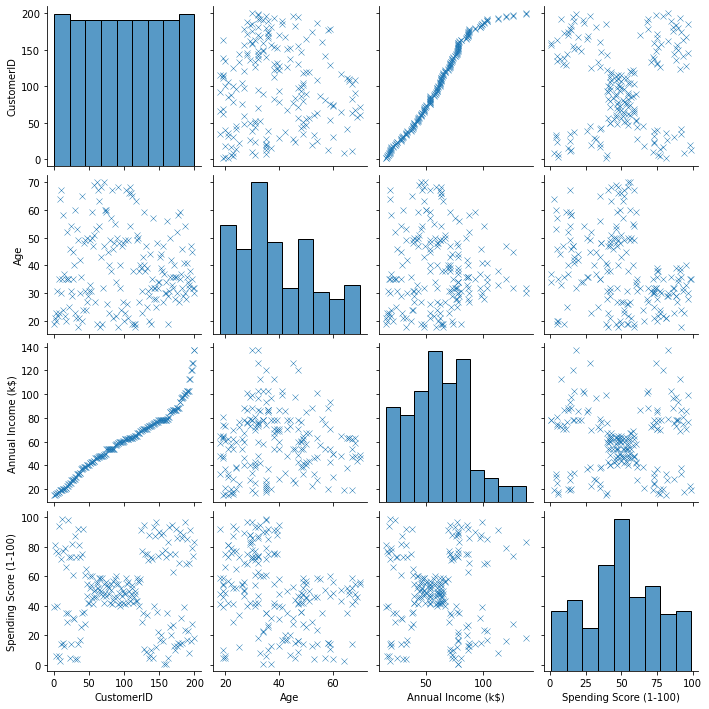

In [6]:
sns.pairplot(df,markers='x')

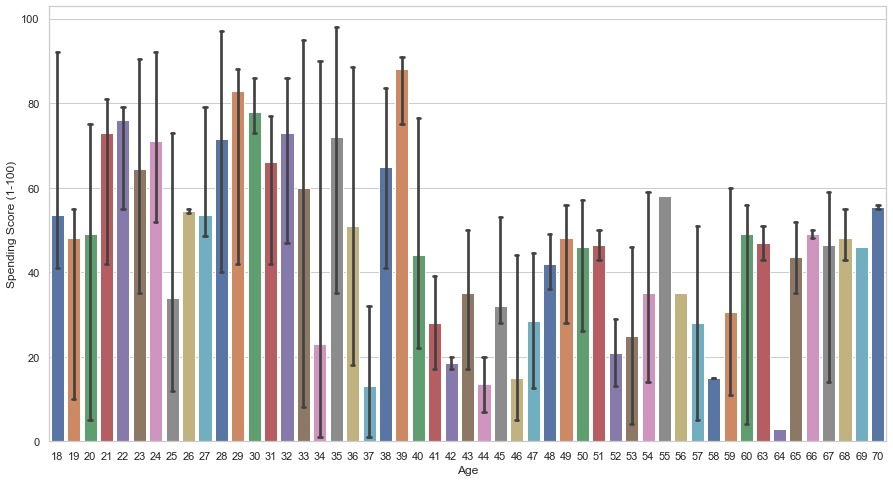

In [7]:
from numpy import median
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
fun= sns.barplot(x="Age",y="Spending Score (1-100)",palette="deep",data =df,estimator=median, capsize=.2)


## Using Pandas_Profiling for visualizations and correlations

###### Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. ... In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable.



In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(df, title='DataFrame Profiling Report', explorative = True)

In [10]:
profile

## Plotting the data points according to the classifications

153.79972565157746
395.1388888888889
325.1043599257885
248.47839135654266
22.56410256410257
62.69598095187782
33.137241230781605
5.339844727017936
20.6651128086059
1.2260451171988616


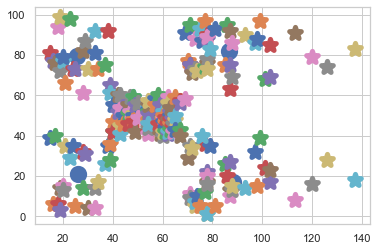

In [11]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color='C0', s=150, linewidths=5)

for classification in clf.classifications:
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="*", s=150, linewidths=5)
        
plt.show()

## Running the algorithm through our max_iterations

153.79972565157746
395.1388888888889
325.1043599257885
248.47839135654266
22.56410256410257
62.69598095187782
33.137241230781605
5.339844727017936
20.6651128086059
1.2260451171988616


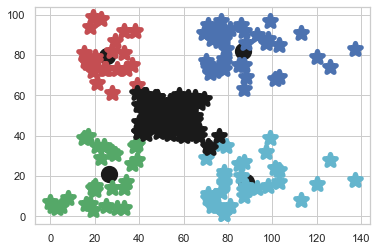

In [12]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="*", color=color, s=150, linewidths=5)
        


unknowns = np.array([[1,5],
                     [8,9],
                     [0,7],
                     [5,5],
                     [3,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

# References :

1. https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis
2. https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25